In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#加载数据集
iris = load_iris()

In [34]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [35]:
df.columns = ["sepal length","sepal width","petal length", "petal width","label"]
print(df.label.value_counts())

0    50
1    50
2    50
Name: label, dtype: int64


In [70]:
#取前100行为样本
data = np.array(df.iloc[:100,])


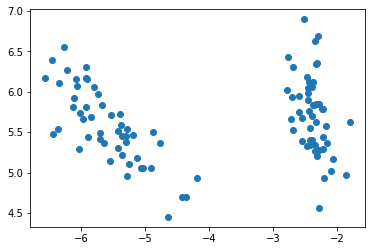

In [71]:
X, y = data[:, :-1],data[:, -1]
y = np.array([1 if i==1 else -1 for i in y])
X,y
m = np.mean(X,axis=0)
cov = (X - m.reshape([1,-1])).T.dot(X - m.reshape([1,-1]))
cov.shape
w,P = np.linalg.eig(cov)
XP = X.dot(P[:,:2])
plt.scatter(XP[:,0],XP[:,1])


In [64]:
#用Sklearn封装的感知机API
import sklearn
from sklearn.linear_model import Perceptron

In [65]:
clf = Perceptron()
clf.fit(XP,y)

Perceptron()

In [67]:
#特征的权重，相当于w
clf.coef_

array([[-7.18987488, -5.79689972]])

In [68]:
#相当于截距
clf.intercept_

array([-1.])

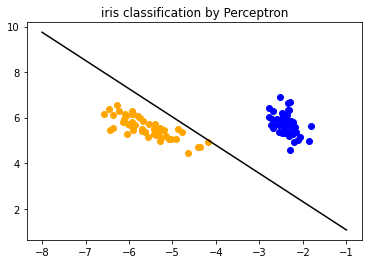

In [72]:
#可视化
plt.title('iris classification by Perceptron')
plt.scatter(XP[:50, 0], XP[:50, 1], color='blue', label='Iris-setosa')
plt.scatter(XP[50:100, 0], XP[50:100, 1], color='orange', label='Iris-Versicolour')

p1 = -8
p2 = (-clf.coef_[0,0]*p1-clf.intercept_)/clf.coef_[0,1]
q1 = -1
q2 = (-clf.coef_[0,0]*q1-clf.intercept_)/clf.coef_[0,1]
plt.plot([p1,q1],[p2,q2],'k-')